# Recognizing the species of a flower

## Importing the necessary modules.

In [1]:
# To work with numpy arrays.
import numpy as np 

# To create the convolution neural network
import keras 

# To provide with the name of the images.
import glob

# To read rgb values of images.
import cv2

# To resize images.
from resizeimage import resizeimage

# To open the image so it can be resized.
from PIL import Image

# To plot images and graphs
import matplotlib.pyplot as plt
%matplotlib inline

# To create the training, testing and validation datasets from a single dataset.
from sklearn.model_selection import train_test_split

# To create the neural network 
from keras.models import Sequential

# To add hidden layers as per requirements
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# To load the model with the best accuracy
from keras.callbacks import ModelCheckpoint

C:\Users\Harsh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Resizing the images.

In [2]:
x=[]
y=[]

# Converting the daisy images to 100x100 pixels.

daisy_images=glob.glob('./deepLearningDatasets/flowers/daisy/*.jpg')

i=1 
for image in daisy_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./deepLearningDatasets/flowers/daisy_100x100/'+str(i)+'.jpg')
    i=i+1
   
# Converting dandelion images to 100x100 pixels.   

dandelion_images=glob.glob('./deepLearningDatasets/flowers/dandelion/*.jpg')

i=1 
for image in dandelion_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./deepLearningDatasets/flowers/dandelion_100x100/'+str(i)+'.jpg')
    i=i+1
    
# Converting rose images to 100x100 pixels.  

rose_images=glob.glob('./deepLearningDatasets/flowers/rose/*.jpg')

i=1 
for image in rose_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./deepLearningDatasets/flowers/rose_100x100/'+str(i)+'.jpg')
    i=i+1    
    
# Converting sunflower images to 100x100 pixels.   

sunflower_images=glob.glob('./deepLearningDatasets/flowers/sunflower/*.jpg')

i=1 
for image in sunflower_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./deepLearningDatasets/flowers/sunflower_100x100/'+str(i)+'.jpg')
    i=i+1

# Converting tulip images to 100x100 pixels.    
    
tulip_images=glob.glob('./deepLearningDatasets/flowers/tulip/*.jpg')

i=1 
for image in tulip_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./deepLearningDatasets/flowers/tulip_100x100/'+str(i)+'.jpg')
    i=i+1    


## Opening the resized images.

In [3]:
# Opening images (This cell will only be functional only if
# the images have been rescaled to and saved in the folders of the same name)

x=[]
y=[]

# Opening the daisy images and storing the rgb values in a list

daisy_images_100x100=glob.glob('./deepLearningDatasets/flowers/daisy_100x100/*.jpg')

i=1 
for image in daisy_images_100x100 :
    img=cv2.imread('./deepLearningDatasets/flowers/daisy_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(0)
    i=i+1
   
# Opening the dandelion images and storing the rgb values in a list  

dandelion_images_100x100=glob.glob('./deepLearningDatasets/flowers/dandelion_100x100/*.jpg')

i=1 
for image in dandelion_images_100x100 :
    img=cv2.imread('./deepLearningDatasets/flowers/dandelion_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(1)
    i=i+1
    
# Opening the daisy images and storing the rgb values in a list   

rose_images_100x100=glob.glob('./deepLearningDatasets/flowers/rose_100x100/*.jpg')

i=1 
for image in rose_images_100x100 :
    img=cv2.imread('./deepLearningDatasets/flowers/rose_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(2)
    i=i+1    
    
# Opening the daisy images and storing the rgb values in a list   

sunflower_images_100x100=glob.glob('./deepLearningDatasets/flowers/sunflower_100x100/*.jpg')

i=1 
for image in sunflower_images_100x100 :
    img=cv2.imread('./deepLearningDatasets/flowers/sunflower_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(3)
    i=i+1

# Opening the daisy images and storing the rgb values in a list    
    
tulip_images_100x100=glob.glob('./deepLearningDatasets/flowers/tulip_100x100/*.jpg')

i=1 
for image in tulip_images_100x100 :
    img=cv2.imread('./deepLearningDatasets/flowers/tulip_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(4)
    i=i+1    


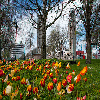

In [4]:
# An exaple of the resized image

new_image

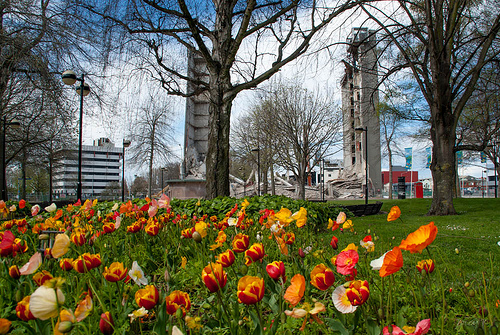

In [5]:
# An example of the orignal image
open_image

In [6]:
# Displaying the rgb values of the images stored in the list x 

x

[array([[[145, 143, 143],
         [146, 144, 144],
         [148, 146, 146],
         ...,
         [153, 152, 154],
         [149, 148, 150],
         [156, 155, 157]],
 
        [[133, 133, 133],
         [139, 139, 139],
         [150, 148, 148],
         ...,
         [155, 154, 156],
         [152, 151, 153],
         [154, 153, 155]],
 
        [[129, 131, 131],
         [139, 139, 139],
         [151, 151, 151],
         ...,
         [157, 156, 158],
         [153, 152, 154],
         [147, 146, 148]],
 
        ...,
 
        [[ 20,  42,  40],
         [ 25,  46,  44],
         [ 28,  46,  45],
         ...,
         [126, 127, 131],
         [123, 124, 128],
         [122, 123, 127]],
 
        [[ 22,  44,  42],
         [ 27,  48,  46],
         [ 29,  47,  46],
         ...,
         [127, 128, 132],
         [125, 126, 130],
         [124, 125, 129]],
 
        [[ 23,  45,  43],
         [ 29,  50,  48],
         [ 31,  49,  48],
         ...,
         [129, 130, 134],
  

### One-hot encoding the labels.

In [7]:
y=keras.utils.to_categorical(y)

### Creating the features to numpy array.

In [8]:
x_new=np.stack(x,axis=0)
x_new=x_new/255
x_new

array([[[[0.56862745, 0.56078431, 0.56078431],
         [0.57254902, 0.56470588, 0.56470588],
         [0.58039216, 0.57254902, 0.57254902],
         ...,
         [0.6       , 0.59607843, 0.60392157],
         [0.58431373, 0.58039216, 0.58823529],
         [0.61176471, 0.60784314, 0.61568627]],

        [[0.52156863, 0.52156863, 0.52156863],
         [0.54509804, 0.54509804, 0.54509804],
         [0.58823529, 0.58039216, 0.58039216],
         ...,
         [0.60784314, 0.60392157, 0.61176471],
         [0.59607843, 0.59215686, 0.6       ],
         [0.60392157, 0.6       , 0.60784314]],

        [[0.50588235, 0.51372549, 0.51372549],
         [0.54509804, 0.54509804, 0.54509804],
         [0.59215686, 0.59215686, 0.59215686],
         ...,
         [0.61568627, 0.61176471, 0.61960784],
         [0.6       , 0.59607843, 0.60392157],
         [0.57647059, 0.57254902, 0.58039216]],

        ...,

        [[0.07843137, 0.16470588, 0.15686275],
         [0.09803922, 0.18039216, 0.17254902]

### Creating training,testing and validation datasets.

In [9]:
# Creating training and testing dataset
# Changed x --> x_new

x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=0.3,random_state=42)

In [10]:
# Creating testing and validaton datasets

x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

## Creating the model.

In [28]:
# Defining the neural network

nn=Sequential()

nn.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(100, 100, 3)))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Dropout(0.5))
nn.add(Flatten())
nn.add(Dense(500, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(5, activation='softmax'))

nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       32896     
__________

## Compiling the model.

In [29]:
# Compiling the model

nn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

### Training the neural network

In [30]:
# Training the neural network   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = nn.fit(x_train, y_train, batch_size=64,epochs=10,validation_data=(x_valid,y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 3026 samples, validate on 649 samples
Epoch 1/10
 - 280s - loss: 1.4138 - acc: 0.3665 - val_loss: 1.2235 - val_acc: 0.4854

Epoch 00001: val_loss improved from inf to 1.22353, saving model to model.weights.best.hdf5
Epoch 2/10
 - 224s - loss: 1.1205 - acc: 0.5413 - val_loss: 1.0597 - val_acc: 0.5655

Epoch 00002: val_loss improved from 1.22353 to 1.05968, saving model to model.weights.best.hdf5
Epoch 3/10
 - 223s - loss: 1.0233 - acc: 0.5872 - val_loss: 0.9641 - val_acc: 0.6225

Epoch 00003: val_loss improved from 1.05968 to 0.96408, saving model to model.weights.best.hdf5
Epoch 4/10
 - 223s - loss: 0.9589 - acc: 0.6091 - val_loss: 0.9175 - val_acc: 0.6441

Epoch 00004: val_loss improved from 0.96408 to 0.91753, saving model to model.weights.best.hdf5
Epoch 5/10
 - 222s - loss: 0.9050 - acc: 0.6355 - val_loss: 0.9434 - val_acc: 0.6394

Epoch 00005: val_loss did not improve from 0.91753
Epoch 6/10
 - 216s - loss: 0.8433 - acc: 0.6675 - val_loss: 0.8715 - val_acc: 0.6595

Epoch 

#### Loadinng the weights which yeilded the maximum accuracy on the validation dataset

In [31]:
# load the weights that yielded the best validation accuracy
nn.load_weights('model.weights.best.hdf5')

### Testing the model on testing dataset.

In [38]:
# Testing
score = nn.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6898148148148148


In [33]:
# Defining the labels

labels=['Daisy','Dandelion','Rose','Sunflower','Tulip']

In [34]:
# get predictions on the test set
y_hat = nn.predict(x_test)
y_hat

array([[6.17763251e-02, 1.22706324e-01, 1.26060262e-01, 2.92298436e-01,
        3.97158623e-01],
       [4.36385013e-02, 9.12052274e-01, 2.80373544e-02, 5.62307006e-03,
        1.06488904e-02],
       [1.31639168e-02, 5.75162994e-04, 5.71787238e-01, 1.47709914e-03,
        4.12996560e-01],
       ...,
       [2.25198567e-01, 6.57073140e-01, 7.99869969e-02, 9.28640366e-03,
        2.84549091e-02],
       [1.43492856e-04, 1.16001866e-06, 7.59504139e-01, 2.00443947e-06,
        2.40349114e-01],
       [2.44241767e-02, 1.77665334e-03, 2.07455456e-02, 9.39964831e-01,
        1.30887879e-02]], dtype=float32)

### Printing results for some random images.

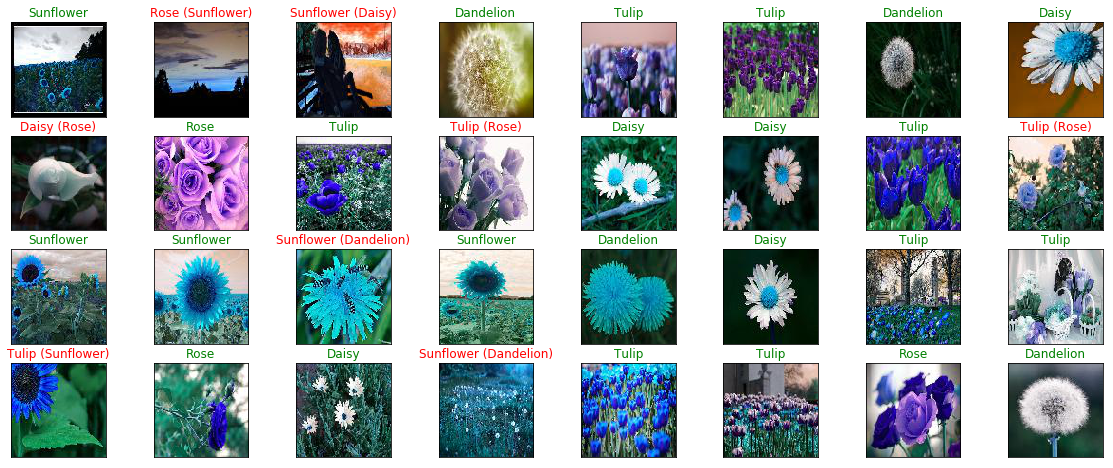

In [39]:
# Plotting a random sample of test images, their predicted and actual labels

fig=plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)) :
    ax=fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx=np.argmax(y_hat[idx])
    true_idx=np.argmax(y_test[idx])
    if pred_idx==true_idx :
        ax.set_title("{}".format(labels[pred_idx]),color=("green"))
    else :
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),color=("red"))

### Testing the model on images from the internet.

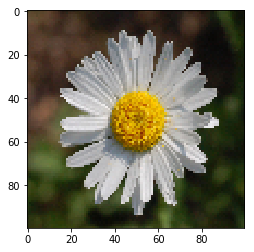

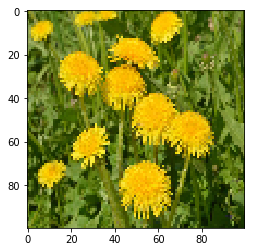

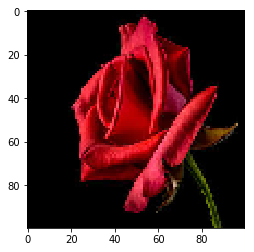

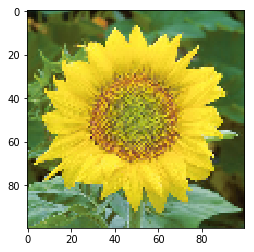

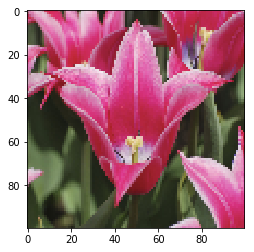

In [36]:
test_images=[]

open_image=Image.open('daisy_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('dandelion_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('rose_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('sunflower_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('tulip_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

test_features=np.stack(test_images)
test_features=test_features/255
y_pred=nn.predict(test_features)

for ab in range(5) :
    plt.imshow(test_images[ab])
    plt.show()    

In [37]:
# Predicted labels for the test images downloaded from the internet.
# Actual labels : Daisy, Dandelion, Rose, Sunflower, Tulip

for ab in range(5) :
    print(labels[np.argmax(y_pred[ab])])

Daisy
Daisy
Rose
Dandelion
Tulip
